# Importing Necessary Libraries
Here, we imported necessary libraries.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dataset Visualization
Here, we printed our dataset with the first 5 tuples to check the set is imported without a problem.

In [12]:
file_path = "../data/concrete_data.xls"
data = pd.read_excel(file_path)
print(data.head())

   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0      

# Preprocessing
Here, first, we split our dataset into 60% train and 40% test. Then, we applied preprocessing by replacing 0 values with mean of each column and scaling the dataset for better results. 

In [13]:
data.replace(0, data.mean(), inplace=True)

print("Dataset after replacing zeros with column means (first 5 rows):")
print(data.head())

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

print("\nScaled data (first 5 rows):")
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
print(scaled_df.head())

X = scaled_data[:, :-1]
y = scaled_data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

Dataset after replacing zeros with column means (first 5 rows):
   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                          73.895485       
1                                          73.895485       
2                                         142.500000       
3                                         142.500000       
4                                         132.400000       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                   54.187136   
1                                   54.187136   
2                                   54.187136   
3                                   54.187136   
4                                   54.18

# Implementing Adjusted R-Square(Exception)
Here, we implemented a function for Adjusted R-square value since there is no built-in function for that in sklearn library. (We could have used another library, but we prefered not to.)

In [14]:
def adjusted_r2_score(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Model 1: Linear Regression
Here, we experimented our first modal, which is Linear Regression. We did not apply grid search since there is no hyperparameters to tune for a basic Linear Regression. We obtained MAE, MSE, RMSE, R-squared and Adjusted R-squared values. To visualize, we printed and plotted:
* Actual and prediction values,
* The metrics we calculated(MAE, MSE, RMSE, R-squared and Adjusted R-squared values).


Linear Regression Model Evaluation Metrics:
                           Metric     Value
0       Mean Absolute Error (MAE)  0.526891
1        Mean Squared Error (MSE)  0.429091
2  Root Mean Squared Error (RMSE)  0.655050
3                             R^2  0.596088
4                    Adjusted R^2  0.588070


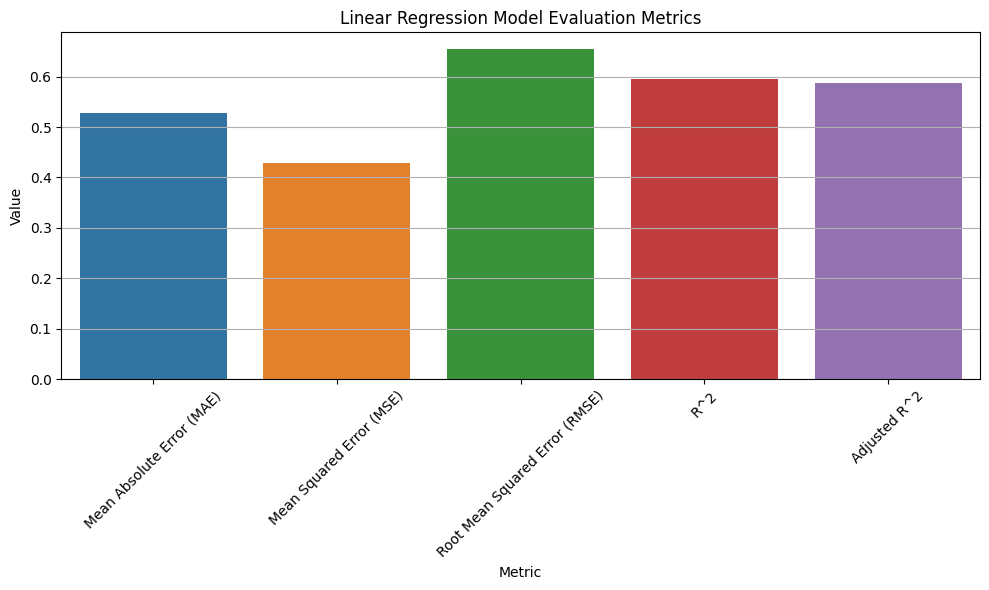


Predictions for Linear Regression:
     Actual Values  Predicted Values
0         1.023531          1.364024
1         1.202450          0.860445
2         2.316508          1.520492
3        -0.030943          0.833117
4        -1.514151         -1.028478
..             ...               ...
407      -0.372840         -0.205572
408      -1.462825         -1.041416
409       0.081041         -0.413027
410       1.759479          1.580028
411      -0.640884          0.455221

[412 rows x 2 columns]


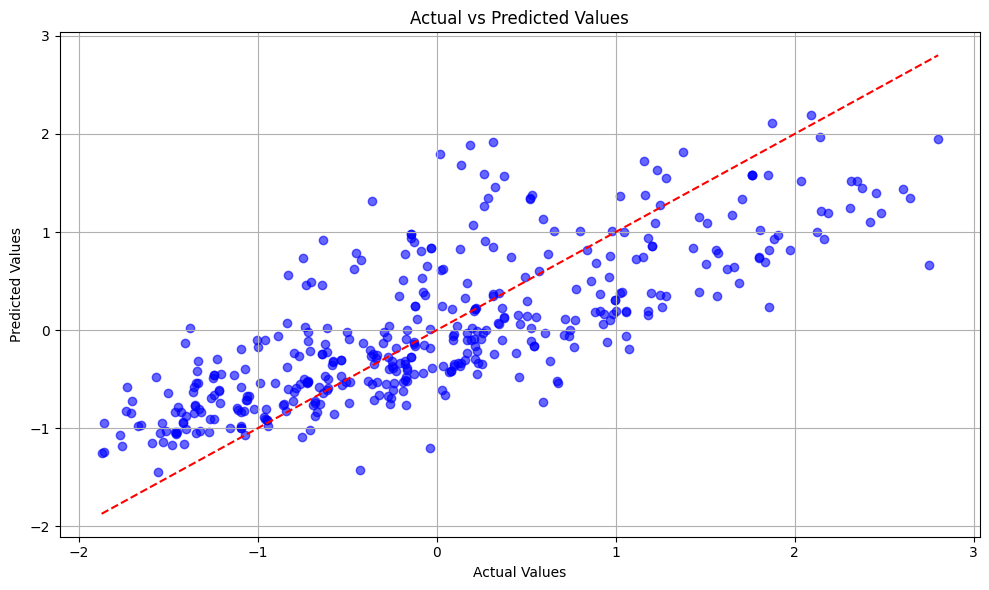

In [15]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)
adj_r2_linear = adjusted_r2_score(r2_linear, len(y_test), X_test.shape[1])

metrics_df = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R^2', 'Adjusted R^2'],
    'Value': [mae_linear, mse_linear, rmse_linear, r2_linear, adj_r2_linear]
})

print("\nLinear Regression Model Evaluation Metrics:")
print(metrics_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', data=metrics_df)
plt.title('Linear Regression Model Evaluation Metrics')
plt.xticks(rotation=45)
plt.ylabel('Value')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

predictions_df = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_pred_linear
})

print("\nPredictions for Linear Regression:")
print(predictions_df)

plt.figure(figsize=(10, 6))
plt.scatter(predictions_df['Actual Values'], predictions_df['Predicted Values'], color='blue', alpha=0.6)
plt.plot([predictions_df['Actual Values'].min(), predictions_df['Actual Values'].max()],
         [predictions_df['Actual Values'].min(), predictions_df['Actual Values'].max()], 'r--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.tight_layout()
plt.show()

# Model 2: Random Forest Regressor
Here, we experimented our second model, which is Random Forest Regressor. We obtained MAE, MSE, RMSE, R-squared and Adjusted R-squared values. We printed the result of grid search, the best predefined set of hyperparameter combinations. To visualize, we also printed and plotted:
* Actual and prediction values,
* The metrics we calculated(MAE, MSE, RMSE, R-squared and Adjusted R-squared values).


Best Hyperparameters from GridSearchCV for Random Forest Regressor:
{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

Random Forest Regressor Model Evaluation Metrics:
                           Metric     Value
0       Mean Absolute Error (MAE)  0.254207
1        Mean Squared Error (MSE)  0.129778
2  Root Mean Squared Error (RMSE)  0.360247
3                             R^2  0.877837
4                    Adjusted R^2  0.875412


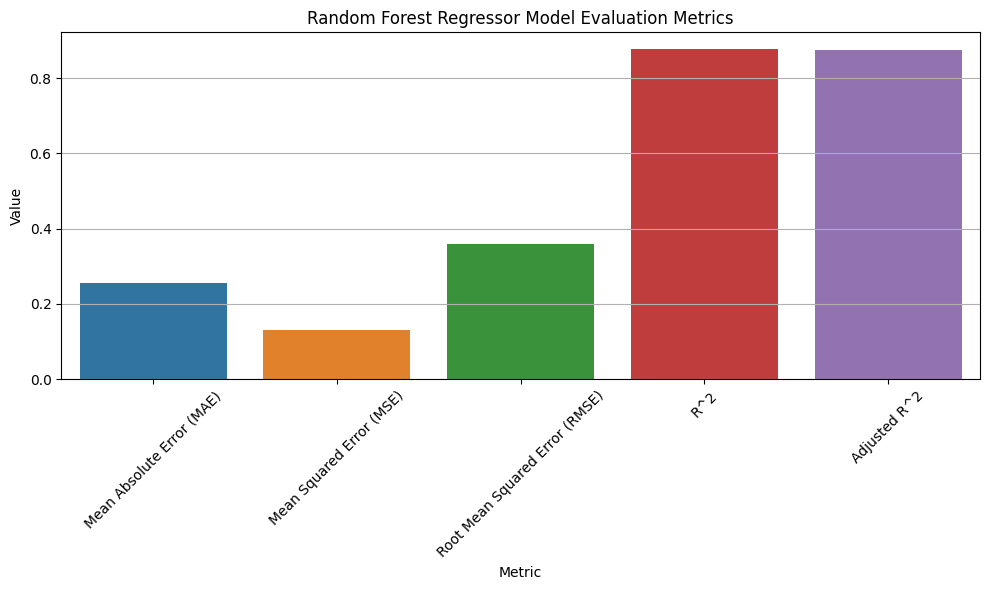


Predictions for Random Forest Regressor:
     Actual Values  Predicted Values
0         1.023531          0.966967
1         1.202450          0.245646
2         2.316508          2.016185
3        -0.030943         -0.109021
4        -1.514151         -1.456474
..             ...               ...
407      -0.372840         -0.333118
408      -1.462825         -1.538304
409       0.081041          0.286268
410       1.759479          1.696244
411      -0.640884         -0.513018

[412 rows x 2 columns]


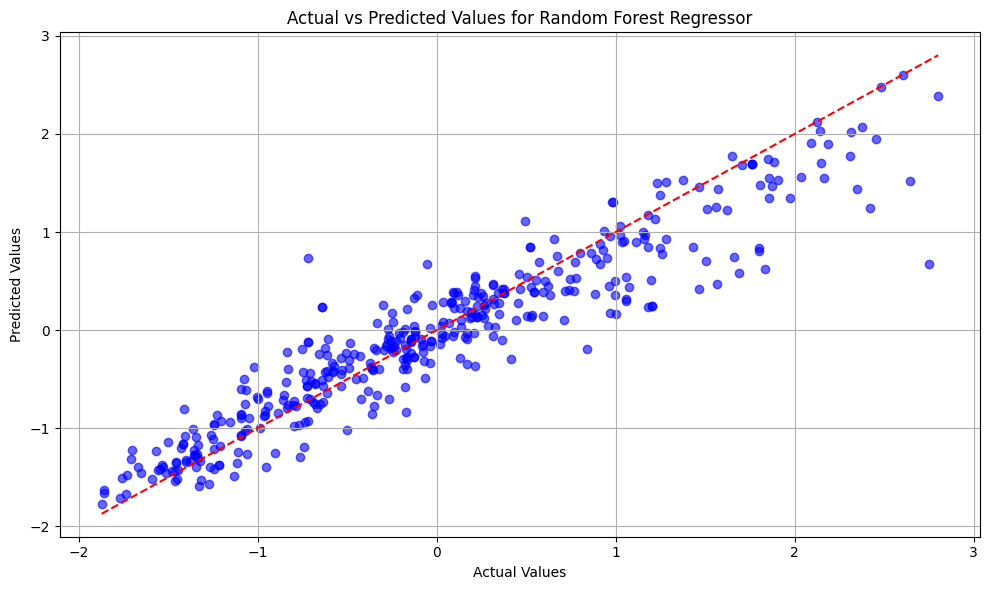

In [16]:
param_grid_forest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

forest_model = RandomForestRegressor(random_state=42)
grid_search_forest = GridSearchCV(forest_model, param_grid_forest, cv=5, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train, y_train)

print("\nBest Hyperparameters from GridSearchCV for Random Forest Regressor:")
print(grid_search_forest.best_params_)

best_forest_model = grid_search_forest.best_estimator_
y_pred_forest = best_forest_model.predict(X_test)

mae_forest = mean_absolute_error(y_test, y_pred_forest)
mse_forest = mean_squared_error(y_test, y_pred_forest)
rmse_forest = np.sqrt(mse_forest)
r2_forest = r2_score(y_test, y_pred_forest)
adj_r2_forest = adjusted_r2_score(r2_forest, len(y_test), X_test.shape[1])

metrics_df_forest = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R^2', 'Adjusted R^2'],
    'Value': [mae_forest, mse_forest, rmse_forest, r2_forest, adj_r2_forest]
})

print("\nRandom Forest Regressor Model Evaluation Metrics:")
print(metrics_df_forest)

predictions_df_forest = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_pred_forest
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', data=metrics_df_forest)
plt.title('Random Forest Regressor Model Evaluation Metrics')
plt.xticks(rotation=45)
plt.ylabel('Value')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print("\nPredictions for Random Forest Regressor:")
print(predictions_df_forest)

plt.figure(figsize=(10, 6))
plt.scatter(predictions_df_forest['Actual Values'], predictions_df_forest['Predicted Values'], color='blue', alpha=0.6)
plt.plot([predictions_df_forest['Actual Values'].min(), predictions_df_forest['Actual Values'].max()],
         [predictions_df_forest['Actual Values'].min(), predictions_df_forest['Actual Values'].max()], 'r--')
plt.title('Actual vs Predicted Values for Random Forest Regressor')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.tight_layout()
plt.show()

# Model 3: Neural Network (MLP Regressor)
Here, we experimented our third model, which is Neural Network (MLP Regressor). We obtained MAE, MSE, RMSE, R-squared and Adjusted R-squared values. We printed the result of grid search, the best predefined set of hyperparameter combinations. To visualize, we also printed and plotted:
* Actual and prediction values,
* The metrics we calculated(MAE, MSE, RMSE, R-squared and Adjusted R-squared values).


Best Hyperparameters from GridSearchCV for MLP Regressor:
{'activation': 'relu', 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.001, 'max_iter': 1000}

Neural Network (MLP Regressor) Model Evaluation Metrics:
                           Metric     Value
0       Mean Absolute Error (MAE)  0.259388
1        Mean Squared Error (MSE)  0.126353
2  Root Mean Squared Error (RMSE)  0.355461
3                             R^2  0.881062
4                    Adjusted R^2  0.878700


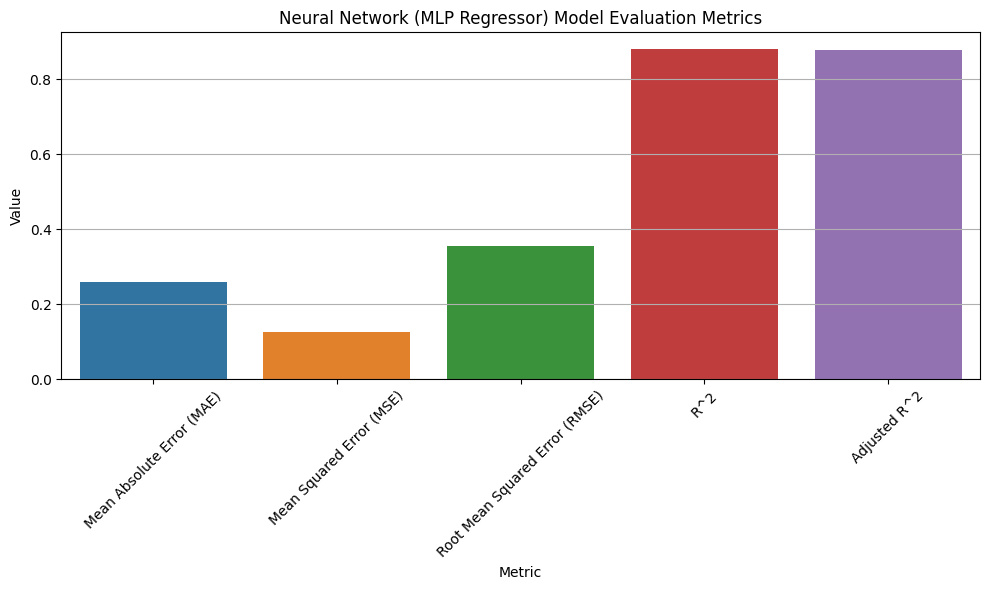


Predictions for MLP Regressor:
     Actual Values  Predicted Values
0         1.023531          1.036913
1         1.202450          0.383248
2         2.316508          2.024867
3        -0.030943          0.110788
4        -1.514151         -1.575729
..             ...               ...
407      -0.372840         -0.498785
408      -1.462825         -1.570538
409       0.081041          0.053455
410       1.759479          1.865474
411      -0.640884         -0.046575

[412 rows x 2 columns]


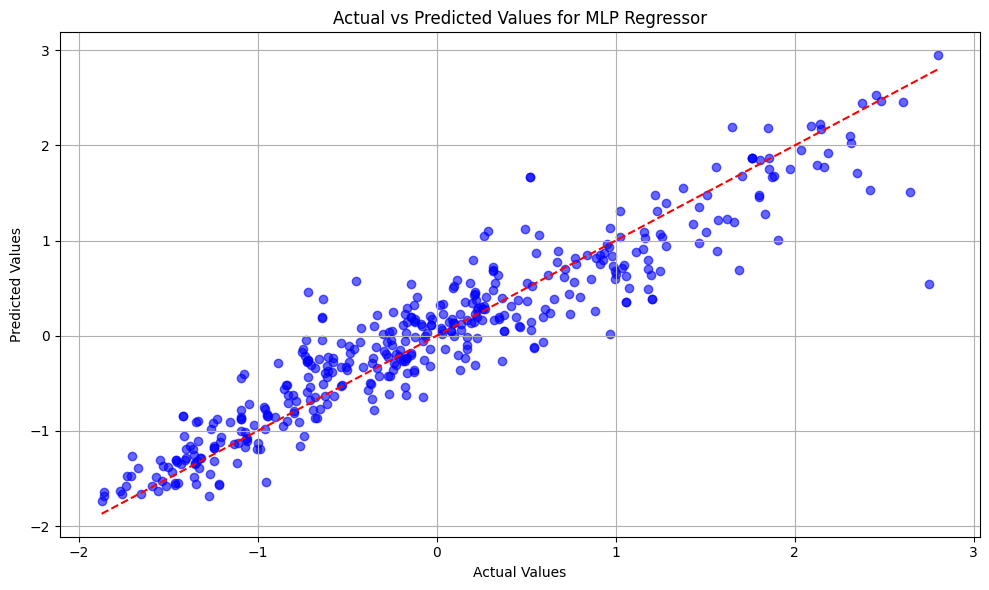

In [17]:
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'max_iter': [1000, 5000],
    'learning_rate_init': [0.001, 0.01]
}

nn_model = MLPRegressor(random_state=42)

grid_search_nn = GridSearchCV(nn_model, param_grid_nn, cv=5, scoring='neg_mean_squared_error')
grid_search_nn.fit(X_train, y_train)

print("\nBest Hyperparameters from GridSearchCV for MLP Regressor:")
print(grid_search_nn.best_params_)

best_nn_model = grid_search_nn.best_estimator_
y_pred_nn = best_nn_model.predict(X_test)

mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test, y_pred_nn)
adj_r2_nn = adjusted_r2_score(r2_nn, len(y_test), X_test.shape[1])

metrics_df_nn = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R^2', 'Adjusted R^2'],
    'Value': [mae_nn, mse_nn, rmse_nn, r2_nn, adj_r2_nn]
})

print("\nNeural Network (MLP Regressor) Model Evaluation Metrics:")
print(metrics_df_nn)

predictions_df_nn = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_pred_nn
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', data=metrics_df_nn)
plt.title('Neural Network (MLP Regressor) Model Evaluation Metrics')
plt.xticks(rotation=45)
plt.ylabel('Value')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print("\nPredictions for MLP Regressor:")
print(predictions_df_nn)

plt.figure(figsize=(10, 6))
plt.scatter(predictions_df_nn['Actual Values'], predictions_df_nn['Predicted Values'], color='blue', alpha=0.6)
plt.plot([predictions_df_nn['Actual Values'].min(), predictions_df_nn['Actual Values'].max()],
         [predictions_df_nn['Actual Values'].min(), predictions_df_nn['Actual Values'].max()], 'r--')
plt.title('Actual vs Predicted Values for MLP Regressor')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.tight_layout()
plt.show()

# Model 4: Ridge Regression
Here, we experimented our fourt model, which is Ridge Regression. It is an extended version of Linear Regression, also known as regularized regression model. We obtained MAE, MSE, RMSE, R-squared and Adjusted R-squared values. We printed the result of grid search, the best predefined set of hyperparameter combinations. To visualize, we also printed and plotted:
* Actual and prediction values,
* The metrics we calculated(MAE, MSE, RMSE, R-squared and Adjusted R-squared values).

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best alpha for Ridge: 10

Ridge Regression Model Evaluation Metrics:
                           Metric     Value
0       Mean Absolute Error (MAE)  0.531325
1        Mean Squared Error (MSE)  0.433719
2  Root Mean Squared Error (RMSE)  0.658573
3                             R^2  0.591731
4                    Adjusted R^2  0.583627


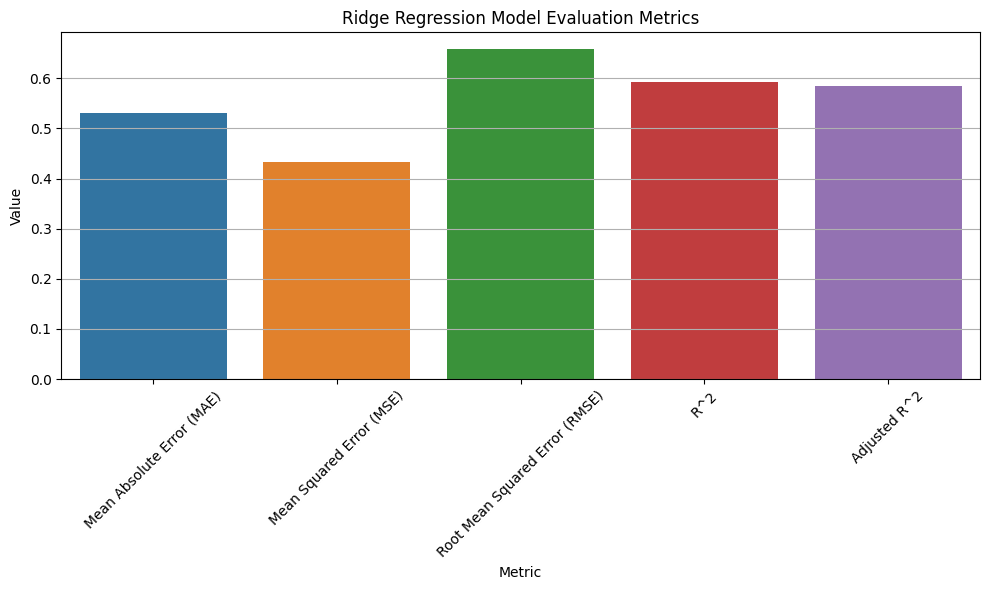


Predictions for Ridge Regression:
     Actual Values  Predicted Values
0         1.023531          1.337322
1         1.202450          0.841626
2         2.316508          1.519167
3        -0.030943          0.815058
4        -1.514151         -0.995812
..             ...               ...
407      -0.372840         -0.196923
408      -1.462825         -1.020064
409       0.081041         -0.392797
410       1.759479          1.559516
411      -0.640884          0.436018

[412 rows x 2 columns]


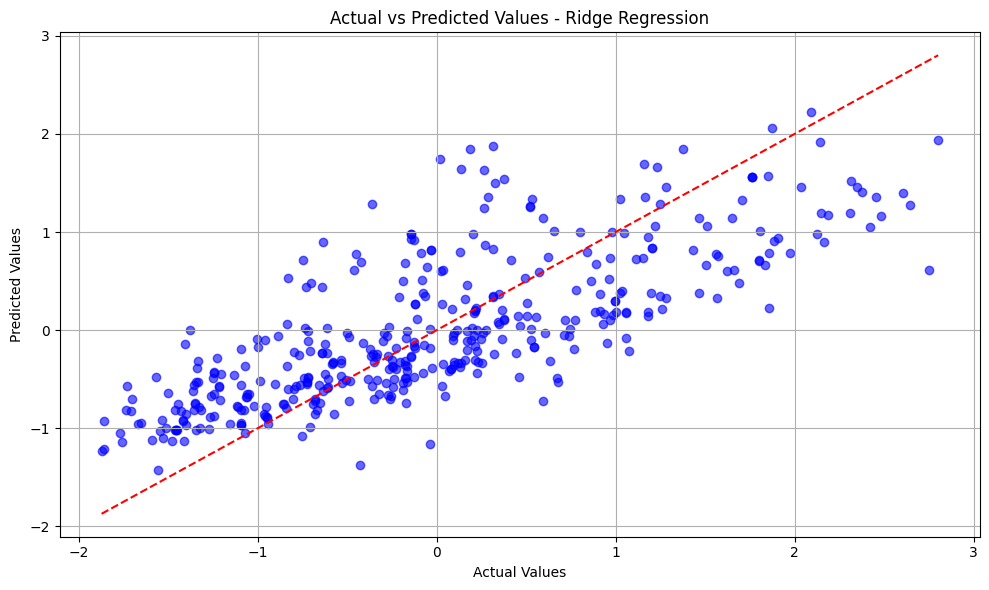

In [18]:
ridge_model = Ridge()

param_grid_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}

grid_search_ridge = GridSearchCV(estimator=ridge_model, param_grid=param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

grid_search_ridge.fit(X_train, y_train)

best_alpha_ridge = grid_search_ridge.best_params_['alpha']
print(f"Best alpha for Ridge: {best_alpha_ridge}")

y_pred_ridge = grid_search_ridge.best_estimator_.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
adj_r2_ridge = adjusted_r2_score(r2_ridge, len(y_test), X_test.shape[1])

metrics_df_ridge = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R^2', 'Adjusted R^2'],
    'Value': [mae_ridge, mse_ridge, rmse_ridge, r2_ridge, adj_r2_ridge]
})

print("\nRidge Regression Model Evaluation Metrics:")
print(metrics_df_ridge)

# Plot metrics
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', data=metrics_df_ridge)
plt.title('Ridge Regression Model Evaluation Metrics')
plt.xticks(rotation=45)
plt.ylabel('Value')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

predictions_df_ridge = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_pred_ridge
})

print("\nPredictions for Ridge Regression:")
print(predictions_df_ridge)

plt.figure(figsize=(10, 6))
plt.scatter(predictions_df_ridge['Actual Values'], predictions_df_ridge['Predicted Values'], color='blue', alpha=0.6)
plt.plot([predictions_df_ridge['Actual Values'].min(), predictions_df_ridge['Actual Values'].max()],
         [predictions_df_ridge['Actual Values'].min(), predictions_df_ridge['Actual Values'].max()], 'r--')
plt.title('Actual vs Predicted Values - Ridge Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.tight_layout()
plt.show()

# Model 5: Lasso Regression
Here, we experimented fifth and the last model, which is Lasso Regression. It is an extended version of Linear Regression, also known as regularized regression model. We obtained MAE, MSE, RMSE, R-squared and Adjusted R-squared values. We printed the result of grid search, the best predefined set of hyperparameter combinations. To visualize, we also printed and plotted:
* Actual and prediction values,
* The metrics we calculated(MAE, MSE, RMSE, R-squared and Adjusted R-squared values).

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best alpha for Lasso: 0.01

Lasso Regression Model Evaluation Metrics:
                           Metric     Value
0       Mean Absolute Error (MAE)  0.534989
1        Mean Squared Error (MSE)  0.437168
2  Root Mean Squared Error (RMSE)  0.661187
3                             R^2  0.588484
4                    Adjusted R^2  0.580315


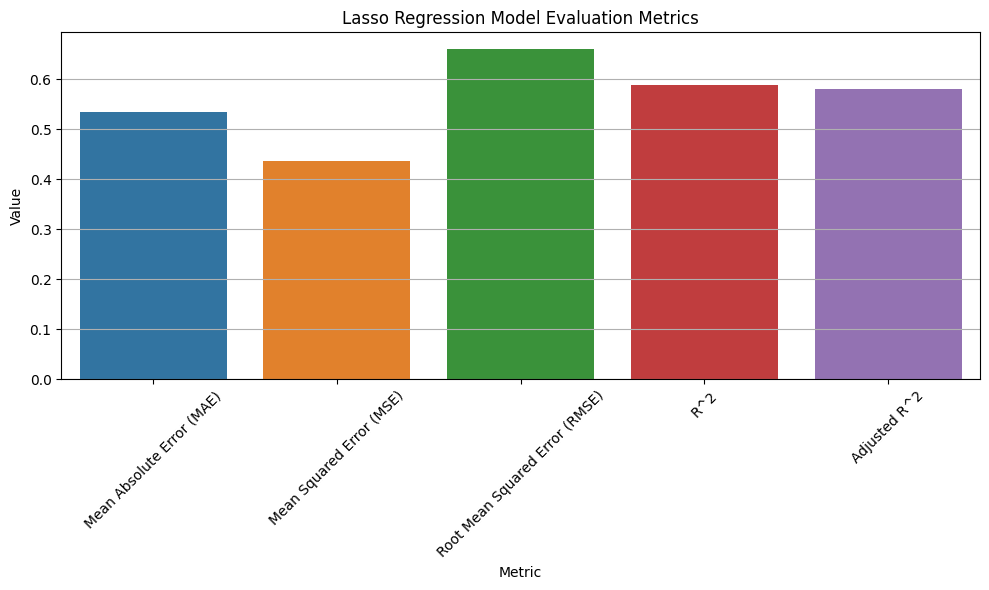


Predictions for Lasso Regression:
     Actual Values  Predicted Values
0         1.023531          1.326808
1         1.202450          0.823270
2         2.316508          1.517827
3        -0.030943          0.797092
4        -1.514151         -1.000121
..             ...               ...
407      -0.372840         -0.201988
408      -1.462825         -0.995339
409       0.081041         -0.381611
410       1.759479          1.550532
411      -0.640884          0.423953

[412 rows x 2 columns]


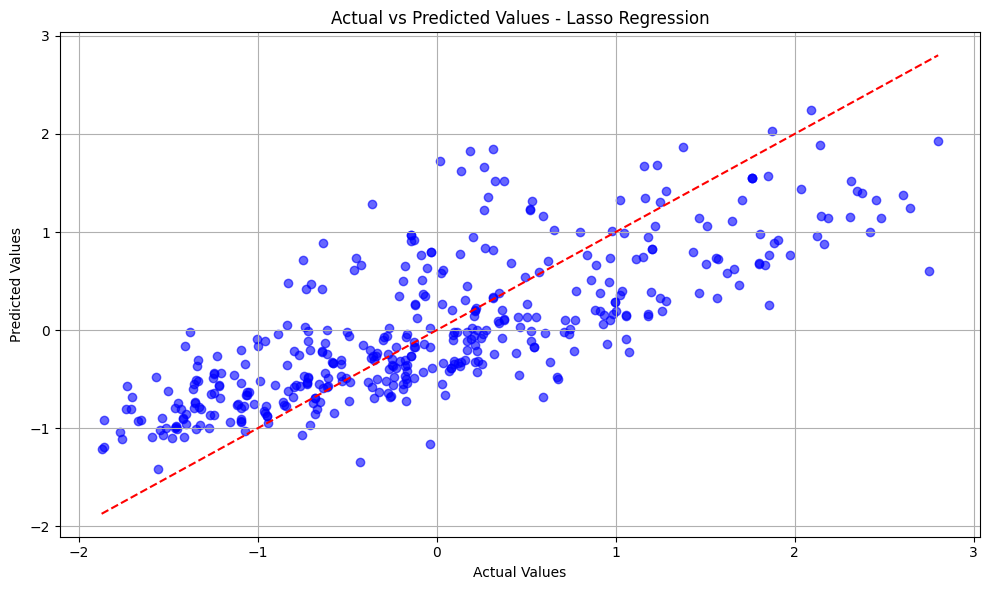

In [20]:
lasso_model = Lasso()

param_grid_lasso = {'alpha': [0.01, 0.1, 1, 10, 100]}

grid_search_lasso = GridSearchCV(estimator=lasso_model, param_grid=param_grid_lasso, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

grid_search_lasso.fit(X_train, y_train)

best_alpha_lasso = grid_search_lasso.best_params_['alpha']
print(f"Best alpha for Lasso: {best_alpha_lasso}")

y_pred_lasso = grid_search_lasso.best_estimator_.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
adj_r2_lasso = adjusted_r2_score(r2_lasso, len(y_test), X_test.shape[1])

metrics_df_lasso = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R^2', 'Adjusted R^2'],
    'Value': [mae_lasso, mse_lasso, rmse_lasso, r2_lasso, adj_r2_lasso]
})

print("\nLasso Regression Model Evaluation Metrics:")
print(metrics_df_lasso)

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', data=metrics_df_lasso)
plt.title('Lasso Regression Model Evaluation Metrics')
plt.xticks(rotation=45)
plt.ylabel('Value')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

predictions_df_lasso = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_pred_lasso
})

print("\nPredictions for Lasso Regression:")
print(predictions_df_lasso)

plt.figure(figsize=(10, 6))
plt.scatter(predictions_df_lasso['Actual Values'], predictions_df_lasso['Predicted Values'], color='blue', alpha=0.6)
plt.plot([predictions_df_lasso['Actual Values'].min(), predictions_df_lasso['Actual Values'].max()],
         [predictions_df_lasso['Actual Values'].min(), predictions_df_lasso['Actual Values'].max()], 'r--')
plt.title('Actual vs Predicted Values - Lasso Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.tight_layout()
plt.show()